In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# May 2022 Dataset

Cleaning

In [2]:
df = pd.read_csv("/content/May-2022.csv")
df.replace('Nill', np.nan, inplace=True)
df.replace('#VALUE!', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1330 non-null   int64 
 1   Product_SKU       1330 non-null   object
 2   Product_Style_ID  1330 non-null   object
 3   Product_Catalog   1257 non-null   object
 4   Product_Category  1257 non-null   object
 5   Product_Weight    1257 non-null   object
 6   Transfer_Price    1324 non-null   object
 7   Old_MRP           1293 non-null   object
 8   Final_Old_MRP     1293 non-null   object
 9   Ajio_MRP          1293 non-null   object
 10  Amazon_MRP        1293 non-null   object
 11  Amazon_FBA_MRP    1293 non-null   object
 12  Flipkart_MRP      1293 non-null   object
 13  Limeroad_MRP      1293 non-null   object
 14  Myntra_MRP        1299 non-null   object
 15  Paytm_MRP         1293 non-null   object
 16  Snapdeal_MRP      1293 non-null   object
dtypes: int64(1), o

Preprocessing

In [3]:
unique_Catalog = df['Product_Catalog'].unique()
Catalog_valuecount = df['Product_Catalog'].value_counts()
Catalog_nullcount = df['Product_Catalog'].isnull().sum()
print("Unique Product Catalog values:", unique_Catalog)
print(Catalog_valuecount)
print("Null values:",Catalog_nullcount)

Unique Product Catalog values: ['Moments' 'Colors-8' 'Breeze-4' 'Rozana' 'Colors-7' 'Mix' 'Surmaya'
 'Four Gems 2' nan]
Product_Catalog
Mix            830
Surmaya        192
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 73


In [4]:
le_style = LabelEncoder()
le_catalog = LabelEncoder()

df['Product_Style_ID_encoded'] = le_style.fit_transform(df['Product_Style_ID'])
df['Product_Catalog_encoded'] = le_catalog.fit_transform(df['Product_Catalog'].astype(str))

train_data = df[df['Product_Catalog'].notnull()]
test_data = df[df['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    df.loc[df['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [5]:
Catalog_valuecount = df['Product_Catalog'].value_counts()
print(Catalog_valuecount)

Catalog_nullcount = df['Product_Catalog'].isnull().sum()
print("Null values:",Catalog_nullcount)

Product_Catalog
Mix            865
Surmaya        230
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 0


In [6]:
unique_Category = df['Product_Category'].unique()
Category_valuecount = df['Product_Category'].value_counts()
Category_nullcount = df['Product_Category'].isnull().sum()
print("Unique Product Category values:", unique_Category)
print(Category_valuecount)
print("Null values:",Category_nullcount)

Unique Product Category values: ['Kurta' 'Kurta Set' 'Gown' 'Tops' nan]
Product_Category
Kurta        820
Kurta Set    360
Tops          45
Gown          32
Name: count, dtype: int64
Null values: 73


In [7]:
le_category = LabelEncoder()

df['Product_Category_encoded'] = le_category.fit_transform(df['Product_Category'].astype(str))

train_data = df[df['Product_Category'].notnull()]
test_data = df[df['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    df.loc[df['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [8]:
weight_mapping = {
    'Gown': 0.4,
    'Kurta Set': 0.4,
    'Kurta': 0.3,
    'Tops': 0.2
}

df['Product_Weight'] = df.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)

In [9]:
df['Transfer_Price'] = pd.to_numeric(df['Transfer_Price'], errors='coerce')
df['Old_MRP'] = pd.to_numeric(df['Old_MRP'], errors='coerce')
df['Final_Old_MRP'] =pd.to_numeric(df['Final_Old_MRP'], errors='coerce')
df['Ajio_MRP'] = pd.to_numeric(df['Ajio_MRP'], errors='coerce')
df['Amazon_MRP'] = pd.to_numeric(df['Amazon_MRP'], errors='coerce')
df['Amazon_FBA_MRP'] = pd.to_numeric(df['Amazon_FBA_MRP'], errors='coerce')
df['Flipkart_MRP'] = pd.to_numeric(df['Flipkart_MRP'], errors='coerce')
df['Limeroad_MRP'] = pd.to_numeric(df['Limeroad_MRP'], errors='coerce')
df['Myntra_MRP'] = pd.to_numeric(df['Myntra_MRP'], errors='coerce')
df['Paytm_MRP'] = pd.to_numeric(df['Paytm_MRP'], errors='coerce')
df['Snapdeal_MRP'] = pd.to_numeric(df['Snapdeal_MRP'], errors='coerce')
df['Product_Weight'] = pd.to_numeric(df['Product_Weight'], errors='coerce')

In [10]:
df['Product_SKU'] = df['Product_SKU'].astype(str)
df['Product_Style_ID'] = df['Product_Style_ID'].astype(str)
df['Product_Catalog'] = df['Product_Catalog'].astype(str)
df['Product_Category'] = df['Product_Category'].astype(str)

In [11]:
train_data = df[df['Transfer_Price'].notnull()]
test_data = df[df['Transfer_Price'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

df.loc[df['Transfer_Price'].isnull(), 'Transfer_Price'] = predicted_transferprice

In [12]:
columns_to_fill = ['Old_MRP', 'Final_Old_MRP', 'Ajio_MRP',
                   'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
                   'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

for column in columns_to_fill:
    train_data = df[df[column].notnull()]
    test_data = df[df[column].isnull()]

    if not train_data.empty and not test_data.empty:
        X_train = train_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price']]
        y_train = train_data[column]
        X_test = test_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price']]

        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X_train, y_train)
        predicted_values = knn.predict(X_test)

        df.loc[df[column].isnull(), column] = predicted_values

df.drop(columns=['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1330 non-null   int64  
 1   Product_SKU       1330 non-null   object 
 2   Product_Style_ID  1330 non-null   object 
 3   Product_Catalog   1330 non-null   object 
 4   Product_Category  1330 non-null   object 
 5   Product_Weight    1330 non-null   float64
 6   Transfer_Price    1330 non-null   float64
 7   Old_MRP           1330 non-null   float64
 8   Final_Old_MRP     1330 non-null   float64
 9   Ajio_MRP          1330 non-null   float64
 10  Amazon_MRP        1330 non-null   float64
 11  Amazon_FBA_MRP    1330 non-null   float64
 12  Flipkart_MRP      1330 non-null   float64
 13  Limeroad_MRP      1330 non-null   float64
 14  Myntra_MRP        1330 non-null   float64
 15  Paytm_MRP         1330 non-null   float64
 16  Snapdeal_MRP      1330 non-null   float64


Analysing

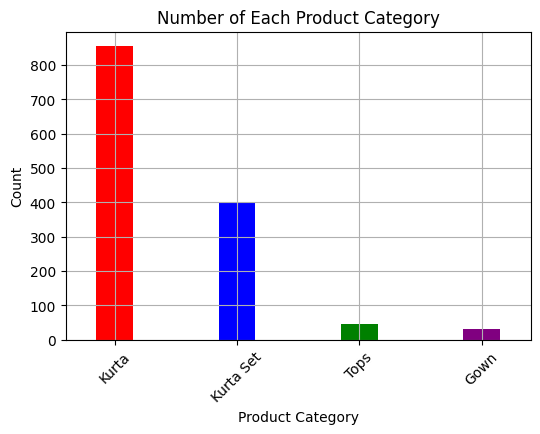

In [14]:
category_counts = df['Product_Category'].value_counts()

plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color=['red', 'blue', 'green', 'purple'], width=0.3)
plt.title('Number of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [15]:
kurta_mean_value = round(df[df['Product_Category'] == 'Kurta']['Final_Old_MRP'].mean(),2)
kurtaSet_mean_value = round(df[df['Product_Category'] == 'Kurta Set']['Final_Old_MRP'].mean(),2)
Gown_mean_value = round(df[df['Product_Category'] == 'Gown']['Final_Old_MRP'].mean(),2)
Tops_mean_value = round(df[df['Product_Category'] == 'Tops']['Final_Old_MRP'].mean(),2)
print(f"The Mean price of Kurta is {kurta_mean_value}. \nThe Mean price of Kurta Set is {kurtaSet_mean_value}. \nThe Mean price of Gowns is {Gown_mean_value}. \nThe Mean price of Tops is {Tops_mean_value}")

The Mean price of Kurta is 2011.32. 
The Mean price of Kurta Set is 2727.09. 
The Mean price of Gowns is 3151.25. 
The Mean price of Tops is 1728.33


In [16]:
mean_values = {}
columns = ['Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
            'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']
for column in columns:
    mean_values[column] = round(df.groupby('Product_Category')[column].mean(),2)
print(mean_values)

{'Amazon_MRP': Product_Category
Gown         3151.25
Kurta        2029.19
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_MRP, dtype: float64, 'Amazon_FBA_MRP': Product_Category
Gown         3151.25
Kurta        2029.19
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_FBA_MRP, dtype: float64, 'Flipkart_MRP': Product_Category
Gown         3151.25
Kurta        2021.69
Kurta Set    2728.43
Tops         1739.44
Name: Flipkart_MRP, dtype: float64, 'Limeroad_MRP': Product_Category
Gown         3151.25
Kurta        2022.74
Kurta Set    2726.95
Tops         1728.33
Name: Limeroad_MRP, dtype: float64, 'Myntra_MRP': Product_Category
Gown         3151.25
Kurta        2014.09
Kurta Set    2719.96
Tops         1728.56
Name: Myntra_MRP, dtype: float64, 'Paytm_MRP': Product_Category
Gown         3151.25
Kurta        2015.96
Kurta Set    2726.95
Tops         1728.33
Name: Paytm_MRP, dtype: float64, 'Snapdeal_MRP': Product_Category
Gown         3151.25
Kurta        2017.83
Kurta Set    272

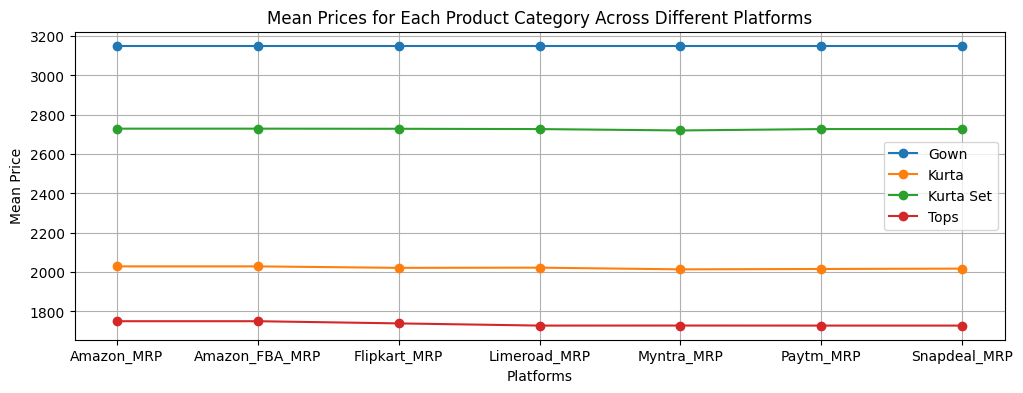

In [17]:
mean_df = pd.DataFrame(mean_values)

plt.figure(figsize=(12, 4))
for category in mean_df.index:
    plt.plot(mean_df.columns, mean_df.loc[category], marker='o', label=category)

plt.title('Mean Prices for Each Product Category Across Different Platforms')
plt.xlabel('Platforms')
plt.ylabel('Mean Price')
plt.legend()
plt.grid(True)
plt.show()

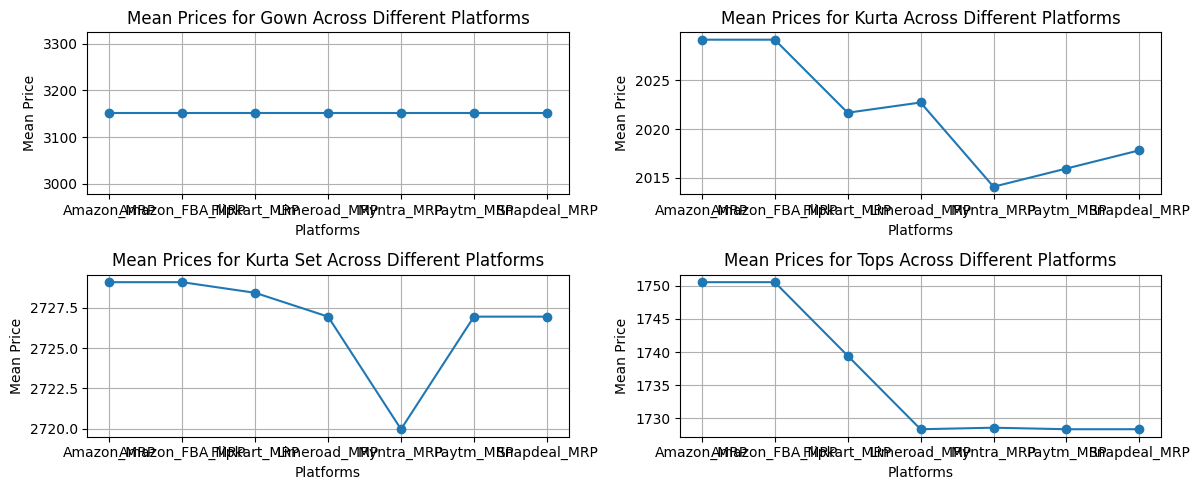

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

categories = mean_df.index
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    ax.plot(mean_df.columns, mean_df.loc[category], marker='o')
    ax.set_title(f'Mean Prices for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Mean Price')
    ax.grid(True)

plt.tight_layout()
plt.show()

# P L March 2021

Cleaning

In [20]:
ds = pd.read_csv("/content/P  L March 2021.csv")
ds.replace('Nill', np.nan, inplace=True)
ds.replace('#VALUE!', np.nan, inplace=True)
ds.rename(columns=lambda x: x.strip(), inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   1330 non-null   int64 
 1   Product_SKU             1330 non-null   object
 2   Product_Style_ID        1330 non-null   object
 3   Product_Catalog         1257 non-null   object
 4   Product_Category        1257 non-null   object
 5   Product_Weight          1257 non-null   object
 6   Transfer_Price_Level_1  1324 non-null   object
 7   Transfer_Price_Level_2  1324 non-null   object
 8   Old_MRP                 1293 non-null   object
 9   Final_Old_MRP           1293 non-null   object
 10  Ajio_MRP                1293 non-null   object
 11  Amazon_MRP              1293 non-null   object
 12  Amazon_FBA_MRP          1293 non-null   object
 13  Flipkart_MRP            1293 non-null   object
 14  Limeroad_MRP            1293 non-null   object
 15  Mynt

In [21]:
ds.head()

,index,Product_SKU,Product_Style_ID,Product_Catalog,Product_Category,Product_Weight,Transfer_Price_Level_1,Transfer_Price_Level_2,Old_MRP,Final_Old_MRP,Ajio_MRP,Amazon_MRP,Amazon_FBA_MRP,Flipkart_MRP,Limeroad_MRP,Myntra_MRP,Paytm_MRP,Snapdeal_MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


Preprocessing

In [22]:
unique_CatalogforMarch = ds['Product_Catalog'].unique()
CatalogforMarch_valuecount = ds['Product_Catalog'].value_counts()
CatalogforMarch_nullcount = ds['Product_Catalog'].isnull().sum()
print("Unique Product Catalog values:", unique_CatalogforMarch)
print(CatalogforMarch_valuecount)
print("Null values:",CatalogforMarch_nullcount)

Unique Product Catalog values: ['Moments' 'Colors-8' 'Breeze-4' 'Rozana' 'Colors-7' 'Mix' 'Surmaya'
 'Four Gems 2' nan]
Product_Catalog
Mix            830
Surmaya        192
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 73


In [23]:
le_style = LabelEncoder()
le_catalog = LabelEncoder()

ds['Product_Style_ID_encoded'] = le_style.fit_transform(ds['Product_Style_ID'])
ds['Product_Catalog_encoded'] = le_catalog.fit_transform(ds['Product_Catalog'].astype(str))

train_data = ds[ds['Product_Catalog'].notnull()]
test_data = ds[ds['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    ds.loc[ds['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [24]:
le_category = LabelEncoder()

ds['Product_Category_encoded'] = le_category.fit_transform(ds['Product_Category'].astype(str))

train_data = ds[ds['Product_Category'].notnull()]
test_data = ds[ds['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    ds.loc[ds['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [25]:
weight_mapping = {
    'Gown': 0.4,
    'Kurta Set': 0.4,
    'Kurta': 0.3,
    'Tops': 0.2
}

ds['Product_Weight'] = ds.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)

In [26]:
ds['Transfer_Price_Level_1'] = pd.to_numeric(ds['Transfer_Price_Level_1'], errors='coerce')
ds['Transfer_Price_Level_2'] = pd.to_numeric(ds['Transfer_Price_Level_2'], errors='coerce')
ds['Old_MRP'] = pd.to_numeric(ds['Old_MRP'], errors='coerce')
ds['Final_Old_MRP'] =pd.to_numeric(ds['Final_Old_MRP'], errors='coerce')
ds['Ajio_MRP'] = pd.to_numeric(ds['Ajio_MRP'], errors='coerce')
ds['Amazon_MRP'] = pd.to_numeric(ds['Amazon_MRP'], errors='coerce')
ds['Amazon_FBA_MRP'] = pd.to_numeric(ds['Amazon_FBA_MRP'], errors='coerce')
ds['Flipkart_MRP'] = pd.to_numeric(ds['Flipkart_MRP'], errors='coerce')
ds['Limeroad_MRP'] = pd.to_numeric(ds['Limeroad_MRP'], errors='coerce')
ds['Myntra_MRP'] = pd.to_numeric(ds['Myntra_MRP'], errors='coerce')
ds['Paytm_MRP'] = pd.to_numeric(ds['Paytm_MRP'], errors='coerce')
ds['Snapdeal_MRP'] = pd.to_numeric(ds['Snapdeal_MRP'], errors='coerce')
ds['Product_Weight'] = pd.to_numeric(ds['Product_Weight'], errors='coerce')

In [27]:
ds['Product_SKU'] = ds['Product_SKU'].astype(str)
ds['Product_Style_ID'] = ds['Product_Style_ID'].astype(str)
ds['Product_Catalog'] = ds['Product_Catalog'].astype(str)
ds['Product_Category'] = ds['Product_Category'].astype(str)

In [28]:
train_data = ds[ds['Transfer_Price_Level_1'].notnull()]
test_data = ds[ds['Transfer_Price_Level_1'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price_Level_1']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

ds.loc[ds['Transfer_Price_Level_1'].isnull(), 'Transfer_Price_Level_1'] = predicted_transferprice

In [29]:
train_data = ds[ds['Transfer_Price_Level_2'].notnull()]
test_data = ds[ds['Transfer_Price_Level_2'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price_Level_2']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

ds.loc[ds['Transfer_Price_Level_2'].isnull(), 'Transfer_Price_Level_2'] = predicted_transferprice

In [30]:
columns_to_fill = ['Old_MRP', 'Final_Old_MRP', 'Ajio_MRP',
                   'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
                   'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

for column in columns_to_fill:
    train_data = ds[ds[column].notnull()]
    test_data = ds[ds[column].isnull()]

    if not train_data.empty and not test_data.empty:
        X_train = train_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2']]
        y_train = train_data[column]
        X_test = test_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2']]

        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X_train, y_train)

        predicted_values = knn.predict(X_test)

        ds.loc[ds[column].isnull(), column] = predicted_values


ds.drop(columns=['Product_Style_ID_encoded', 'Product_Category_encoded', 'Product_Catalog_encoded'], inplace=True)

In [31]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1330 non-null   int64  
 1   Product_SKU             1330 non-null   object 
 2   Product_Style_ID        1330 non-null   object 
 3   Product_Catalog         1330 non-null   object 
 4   Product_Category        1330 non-null   object 
 5   Product_Weight          1330 non-null   float64
 6   Transfer_Price_Level_1  1330 non-null   float64
 7   Transfer_Price_Level_2  1330 non-null   float64
 8   Old_MRP                 1330 non-null   float64
 9   Final_Old_MRP           1330 non-null   float64
 10  Ajio_MRP                1330 non-null   float64
 11  Amazon_MRP              1330 non-null   float64
 12  Amazon_FBA_MRP          1330 non-null   float64
 13  Flipkart_MRP            1330 non-null   float64
 14  Limeroad_MRP            1330 non-null   

Analysing

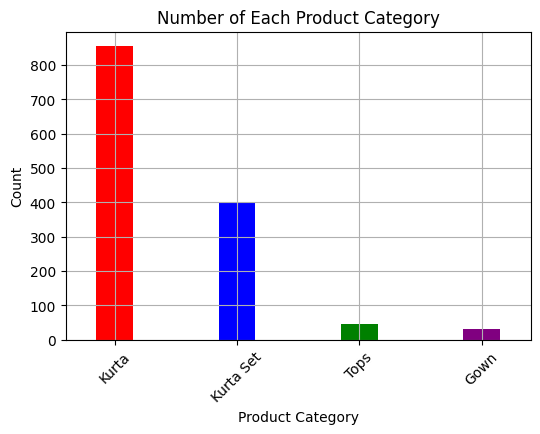

In [32]:
category_counts = ds['Product_Category'].value_counts()

plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color=['red', 'blue', 'green', 'purple'], width=0.3)
plt.title('Number of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [36]:
mean_values1 = {}
columns = ['Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
            'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']
for column in columns:
    mean_values1[column] = round(ds.groupby('Product_Category')[column].mean(),2)
print(mean_values1)

{'Amazon_MRP': Product_Category
Gown         3151.25
Kurta        2025.69
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_MRP, dtype: float64, 'Amazon_FBA_MRP': Product_Category
Gown         3151.25
Kurta        2025.69
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_FBA_MRP, dtype: float64, 'Flipkart_MRP': Product_Category
Gown         3151.25
Kurta        2018.19
Kurta Set    2728.43
Tops         1739.44
Name: Flipkart_MRP, dtype: float64, 'Limeroad_MRP': Product_Category
Gown         3151.25
Kurta        2019.24
Kurta Set    2726.95
Tops         1728.33
Name: Limeroad_MRP, dtype: float64, 'Myntra_MRP': Product_Category
Gown         3151.25
Kurta        2010.59
Kurta Set    2719.96
Tops         1728.56
Name: Myntra_MRP, dtype: float64, 'Paytm_MRP': Product_Category
Gown         3151.25
Kurta        2012.46
Kurta Set    2726.95
Tops         1728.33
Name: Paytm_MRP, dtype: float64, 'Snapdeal_MRP': Product_Category
Gown         3151.25
Kurta        2014.33
Kurta Set    272

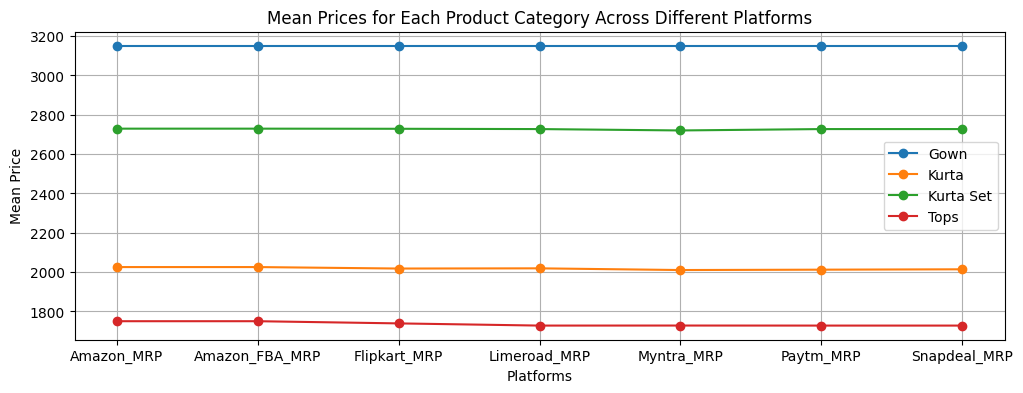

In [37]:
mean_ds = pd.DataFrame(mean_values1)

plt.figure(figsize=(12, 4))
for category in mean_ds.index:
    plt.plot(mean_ds.columns, mean_ds.loc[category], marker='o', label=category)

plt.title('Mean Prices for Each Product Category Across Different Platforms')
plt.xlabel('Platforms')
plt.ylabel('Mean Price')
plt.legend()
plt.grid(True)
plt.show()

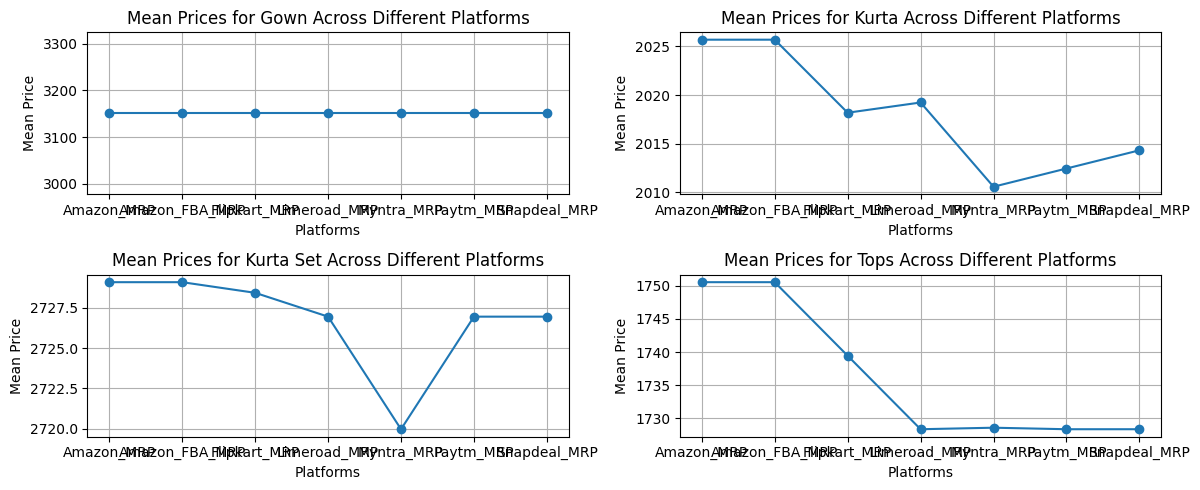

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

categories = mean_ds.index
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    ax.plot(mean_ds.columns, mean_ds.loc[category], marker='o')
    ax.set_title(f'Mean Prices for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Mean Price')
    ax.grid(True)

plt.tight_layout()
plt.show()